In [ ]:
from google.colab import drive
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.corpus.reader.wordnet import NOUN
from nltk.corpus import wordnet

from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

nltk.download('stopwords')
STOP_WORDS = list(stopwords.words('english'))

import re

import sklearn
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
reviews_df = pd.read_csv('/content/fake reviews dataset.csv')

In [ ]:
reviews_df

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [ ]:
reviews_df.label.value_counts()

CG    20216
OR    20216
Name: label, dtype: int64

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

def lemmatize_text(text, lemmatizer):
    """Lemmatize verbs, then re-lemmatize the result."""
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return " ".join([lemmatizer.lemmatize(word) for word in lemmatized_words])

def stem_text(text, stemmer):
    """Stem the text."""
    return " ".join([stemmer.stem(word) for word in text.split()])

def remove_noise(text):
    """Remove unwanted characters and HTML tags from the text."""
    punctuations = """!\"#$%&'()*+/:;<=>?@[\\]^_.`{|}~"""
    words = text.split()
    cleaned_words = []

    for word in words:
        word = re.sub("(<.*?>)", "", word)

        if '-' not in word:
            word = re.sub("(\\W|\\d)", " ", word)
        else:
            word = ''.join([char for char in word if char not in punctuations])

        cleaned_words.append(word.strip())

    return " ".join(cleaned_words)

reviews_df["text_"] = reviews_df['text_'].str.lower()

lemmatizer = WordNetLemmatizer()
reviews_df["lemmatized_text"] = reviews_df["text_"].apply(lambda x: lemmatize_text(x, lemmatizer))

stemmer = PorterStemmer()
reviews_df["stemmed_text"] = reviews_df["lemmatized_text"].apply(lambda x: stem_text(x, stemmer))

reviews_df["cleaned_text"] = reviews_df["stemmed_text"].apply(remove_noise)

reviews_df['CleanedText'] = reviews_df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in STOP_WORDS]))


In [ ]:
'''
4. Get all the extra features.
	1. Semantic Relevance( Too negative or too positive)
	2. Word count
	3. character count
	4. Number of capitalized letters.
	5. Number of exclamation points or question marks.
	6. Punctuation count
	7. Part of speech count
	8. Readability metrics
		1. Flesch-Kincaid Grade Level or Automated Readability Index
		2. information about the readability and complexity of the text.
5. Perform PCA
'''

'\n4. Get all the extra features.\n\t1. Semantic Relevance( Too negative or too positive)\n\t2. Word count\n\t3. character count\n\t4. Number of capitalized letters.\n\t5. Number of exclamation points or question marks.\n\t6. Punctuation count\n\t7. Part of speech count\n\t8. Readability metrics\n\t\t1. Flesch-Kincaid Grade Level or Automated Readability Index\n\t\t2. information about the readability and complexity of the text.\n5. Perform PCA\n'

In [ ]:
from textblob import TextBlob

def categorize_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

reviews_df['sentiment'] = reviews_df['text_'].apply(categorize_sentiment)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive


In [ ]:
discrepancy_df = reviews_df[((reviews_df['sentiment'] == 'Positive') & (reviews_df['rating'] < 3)) |
                            ((reviews_df['sentiment'] == 'Negative') & (reviews_df['rating'] > 3))]

discrepancy_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive
10,Home_and_Kitchen_5,5.0,CG,as advertised. 5th one i've had. the only prob...,a advertised. 5th one i've had. the only probl...,a advertised. 5th one i'v had. the onli proble...,a advertised th one i v had the onli problem b...,advertised th one v onli problem realli,Negative
41,Home_and_Kitchen_5,2.0,CG,sheet color is nice buy for my size for my tow...,sheet color be nice buy for my size for my town.,sheet color be nice buy for my size for my town.,sheet color be nice buy for my size for my town,sheet color nice buy size town,Positive
53,Home_and_Kitchen_5,5.0,CG,got these for the third time. i have a small ...,get these for the third time. i have a small d...,get these for the third time. i have a small d...,get these for the third time i have a small do...,get third time small dog son love throw,Negative
64,Home_and_Kitchen_5,1.0,OR,"super rough, not soft wash cloths, more like b...","super rough, not soft wash cloths, more like b...","super rough, not soft wash cloths, more like b...",super rough not soft wash cloths more like bar...,super rough soft wash cloths like bar towel,Positive


In [ ]:
def semantic_relevance(sentiment, rating):
    if (sentiment == 'Positive' and rating >= 4) or (sentiment == 'Negative' and rating <= 2):
        return 'High Relevance'
    elif sentiment == 'Neutral' or rating == 3:
        return 'Medium Relevance'
    elif (sentiment == 'Positive' and rating <= 2) or (sentiment == 'Negative' and rating >= 4):
        return 'Low Relevance'
    else:
        return 'Uncategorized'

reviews_df['semantic_relevance'] = reviews_df.apply(lambda row: semantic_relevance(row['sentiment'], row['rating']), axis=1)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance


In [ ]:
def word_count(text):
    return len(text.split())
reviews_df['word_count'] = reviews_df['text_'].apply(word_count)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,word_count
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,12
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,16
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,14
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,17
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,18


In [ ]:
def character_count(text):
    return len(text)

reviews_df['character_count'] = reviews_df['text_'].apply(character_count)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,word_count,character_count
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,12,75
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,16,80
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,14,67
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,17,81
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,18,85


In [ ]:
def capitalized_letters_count(text):
    return sum(1 for c in text if c.isupper())

reviews_df['capitalized_count'] = reviews_df['text_'].apply(capitalized_letters_count)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,word_count,character_count,capitalized_count
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,12,75,0
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,16,80,0
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,14,67,0
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,17,81,0
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,18,85,0


In [ ]:
def exclamation_question_count(text):
    return sum(1 for c in text if c in ['!', '?'])

reviews_df['exclamation_question_count'] = reviews_df['text_'].apply(exclamation_question_count)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,12,75,0,2
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,16,80,0,0
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,14,67,0,0
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,17,81,0,1
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,18,85,0,0


In [ ]:
import string
def punctuation_count(text):
    return sum(1 for c in text if c in string.punctuation)

reviews_df['punctuation_count'] = reviews_df['text_'].apply(punctuation_count)

reviews_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,word_count,character_count,capitalized_count,exclamation_question_count,punctuation_count
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,12,75,0,2,5
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,16,80,0,0,3
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,14,67,0,0,2
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,17,81,0,1,2
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,18,85,0,0,2


In [ ]:
import nltk
from collections import Counter
import pandas as pd

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

def part_of_speech_count(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    counts = Counter(tag for word, tag in pos_tags)
    return counts

reviews_df['pos_counts'] = reviews_df['text_'].apply(part_of_speech_count)

pos_counts_df = reviews_df['pos_counts'].apply(pd.Series)

reviews_df = pd.concat([reviews_df, pos_counts_df], axis=1)

reviews_df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,...,SYM,EX,),RBS,FW,(,#,WP$,LS,NNPS
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
!pip install textstat

In [ ]:
import textstat
import pandas as pd

def readability_metrics(text):
    return {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'gunning_fog': textstat.gunning_fog(text),
        'smog_index': textstat.smog_index(text),
        'automated_readability_index': textstat.automated_readability_index(text),
        'coleman_liau_index': textstat.coleman_liau_index(text),
        'dale_chall_readability_score': textstat.dale_chall_readability_score(text)
    }

reviews_df['readability'] = reviews_df['text_'].apply(readability_metrics)

# Convert the dictionaries to a DataFrame
readability_df = pd.DataFrame(reviews_df['readability'].tolist())

# Merge with the original DataFrame
reviews_df = pd.concat([reviews_df, readability_df], axis=1)

# Optionally, you can drop the original 'readability' column if it's no longer needed
reviews_df = reviews_df.drop('readability', axis=1)

# Display the first few rows
reviews_df.head()


,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,...,WP$,LS,NNPS,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,...,NaN,NaN,NaN,90.77,2.1,5.73,0.0,5.9,6.72,6.57
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,...,NaN,NaN,NaN,88.74,2.9,5.70,0.0,1.4,2.45,7.98
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,...,NaN,NaN,NaN,106.67,0.1,2.80,0.0,0.3,1.57,5.11
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,...,NaN,NaN,NaN,79.60,6.4,9.15,0.0,4.8,3.59,7.27
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,...,NaN,NaN,NaN,104.64,0.9,5.82,0.0,0.9,2.23,5.84


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Create a LabelEncoder object
le_sentiment = LabelEncoder()
le_semantic_relevance = LabelEncoder()

# Fit and transform the 'sentiment' column
reviews_df['sentiment_encoded'] = le_sentiment.fit_transform(reviews_df['sentiment'])

# Fit and transform the 'semantic_relevance' column
reviews_df['semantic_relevance_encoded'] = le_semantic_relevance.fit_transform(reviews_df['semantic_relevance'])

# Display the first few rows to verify the encoding
reviews_df.head()

reviews_df.fillna(0, inplace=True)


In [ ]:
column_names = reviews_df.columns.tolist()
print("Column Names:", column_names)

Column Names: ['category', 'rating', 'label', 'text_', 'lemmatized_text', 'stemmed_text', 'cleaned_text', 'CleanedText', 'sentiment', 'semantic_relevance', 'word_count', 'character_count', 'capitalized_count', 'exclamation_question_count', 'punctuation_count', 'pos_counts', 'VB', 'DT', '.', 'RB', 'VBN', ',', 'JJ', 'CC', 'NN', 'VBP', 'PRP', 'IN', 'NNS', 'VBD', 'PRP$', 'VBG', 'WRB', 'TO', 'VBZ', 'CD', 'JJR', '``', '$', "''", 'MD', 'RP', 'WP', 'UH', ':', 'RBR', 'PDT', 'JJS', 'WDT', 'POS', 'NNP', 'SYM', 'EX', ')', 'RBS', 'FW', '(', '#', 'WP$', 'LS', 'NNPS', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index', 'coleman_liau_index', 'dale_chall_readability_score', 'sentiment_encoded', 'semantic_relevance_encoded']


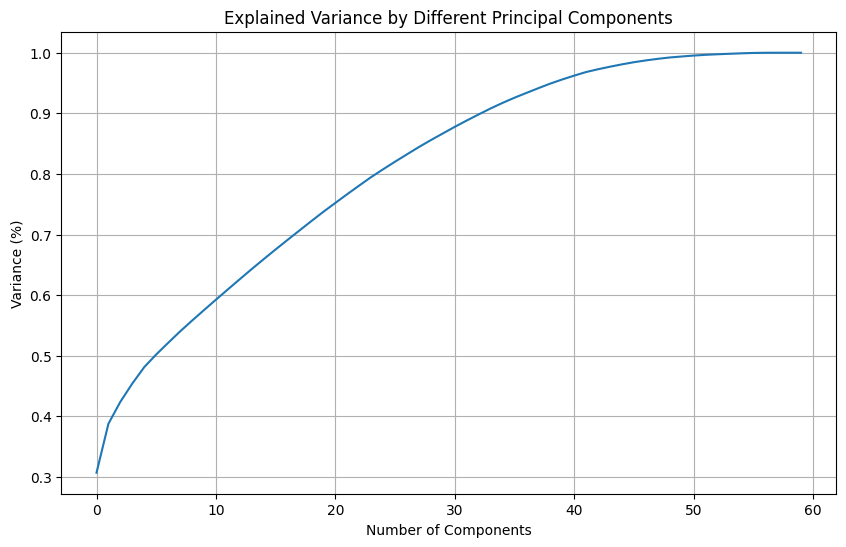

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming 'reviews_df' is a pre-defined DataFrame with numerical features

# Select all numeric columns
numerical_features = reviews_df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'reviews_df' is your DataFrame

# Select all numeric columns
numerical_features = reviews_df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Perform PCA with 40 components
pca = PCA(n_components=40)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
column_names = [f'PC{i+1}' for i in range(40)]  # Generates PC1, PC2, ..., PC40
pca_df = pd.DataFrame(data=principal_components, columns=column_names)



In [ ]:
reviews_df_reset = reviews_df.reset_index(drop=True)
combined_df = pd.concat([reviews_df_reset, pca_df], axis=1)
combined_df.head()

,category,rating,label,text_,lemmatized_text,stemmed_text,cleaned_text,CleanedText,sentiment,semantic_relevance,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,Home_and_Kitchen_5,5.0,CG,"love this! well made, sturdy, and very comfor...","love this! well made, sturdy, and very comfort...","love this! well made, sturdy, and veri comfort...",love this well made sturdy and veri comfortabl...,love well made sturdy veri comfortable love ve...,Positive,High Relevance,...,0.403998,-0.302137,-0.738536,-0.259492,-0.148069,0.072813,0.450632,0.132339,0.071250,-0.110890
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. i...","love it, a great upgrade from the original. i'...","love it, a great upgrad from the original. i'v...",love it a great upgrad from the original i v h...,love great upgrad original v mine coupl year,Positive,High Relevance,...,0.300936,0.091303,-0.452704,-0.053405,-0.152939,-0.100992,0.200065,0.139203,0.223035,0.313138
2,Home_and_Kitchen_5,5.0,CG,this pillow saved my back. i love the look and...,this pillow save my back. i love the look and ...,thi pillow save my back. i love the look and f...,thi pillow save my back i love the look and fe...,thi pillow save back love look feel thi pillow,Positive,High Relevance,...,-0.080069,-0.100520,-0.375734,0.211720,0.225437,-0.042479,0.085848,-0.013588,-0.113307,-0.188416
3,Home_and_Kitchen_5,1.0,CG,"missing information on how to use it, but it i...","miss information on how to use it, but it be a...","miss inform on how to use it, but it be a grea...",miss inform on how to use it but it be a great...,miss inform use great product price,Positive,Low Relevance,...,0.142737,-0.322166,0.225523,-0.332018,0.211747,0.021053,-0.223336,1.322790,-0.119257,0.313401
4,Home_and_Kitchen_5,5.0,CG,very nice set. good quality. we have had the s...,very nice set. good quality. we have have the ...,veri nice set. good quality. we have have the ...,veri nice set good quality we have have the se...,veri nice set good quality set two month,Positive,High Relevance,...,0.436265,0.109223,-0.220690,-0.282445,0.130793,-0.630540,0.290601,0.181200,0.161472,-0.077013


#Bag of Words on uncleaned data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

bow_vect=CountVectorizer()

# On Uncleaned data
bow=bow_vect.fit_transform(combined_df['text_'].values)

In [ ]:
bow

<40432x41099 sparse matrix of type '<class 'numpy.int64'>'
	with 1681263 stored elements in Compressed Sparse Row format>

In [ ]:
bow.shape

(40432, 41099)

#Tf-idf on uncleaned data

In [ ]:
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(combined_df['text_'].values)

In [ ]:
tfidf.shape

(40432, 41099)

# Bow on cleaned data


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vect = CountVectorizer()
bow = bow_vect.fit_transform(combined_df['CleanedText'].astype(str).values)

In [ ]:
bow.shape

(40432, 36909)

In [ ]:
#On 2000 data points
from sklearn.manifold import TSNE
X = bow[:2000, :].toarray()

In [ ]:
tsne = TSNE(n_components = 2, perplexity = 20).fit_transform(X)
df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, combined_df['label'].iloc[:2000]], axis = 1)

Text(0.5, 1.0, 'Perplexity = 20')

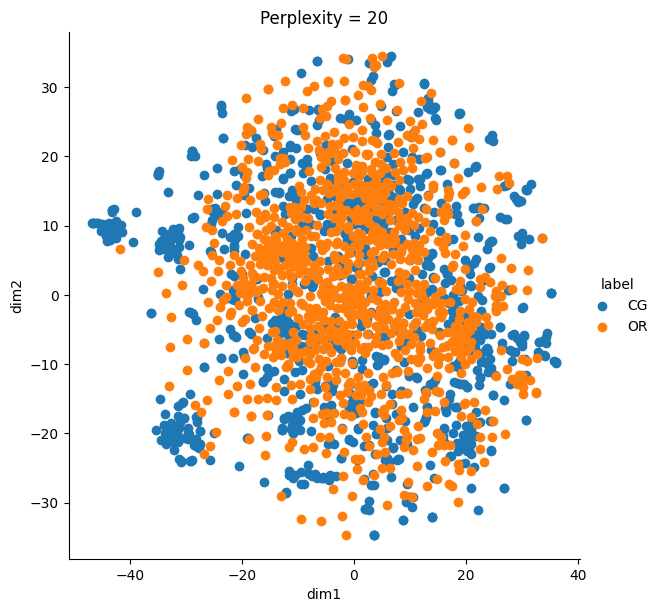

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.FacetGrid(df, hue = 'label', height = 6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 20')

#TF-IDF on cleaned data


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vect=TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(combined_df['CleanedText'].astype(str).values)

In [ ]:
tfidf.shape

(40432, 36909)

In [ ]:
#On 2000 data points
Y = tfidf[:2000, :].toarray()

Text(0.5, 1.0, 'Perplexity = 20')

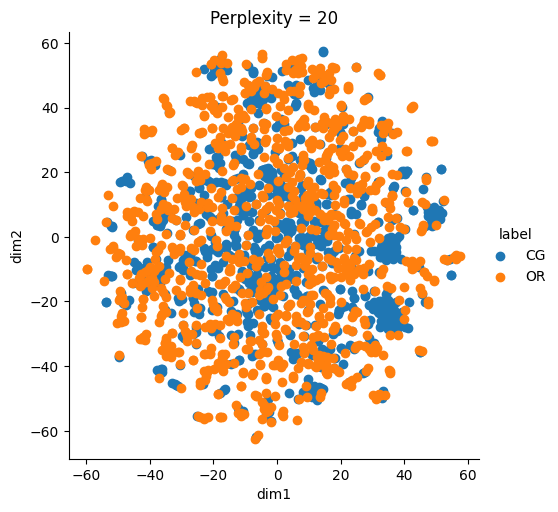

In [ ]:
tsne = TSNE(n_components = 2, perplexity = 20).fit_transform(Y)
df1 = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df1 = pd.concat([df1, combined_df['label'].iloc[:2000]], axis = 1)
sns.FacetGrid(df1, hue = 'label', height = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title('Perplexity = 20')

#Applying Word2Vec

In [ ]:
list_of_sent = []
for i in range(len(combined_df['CleanedText'])):
    list_of_sent.append(str(combined_df['CleanedText'][i]).split())

In [ ]:
list_of_sent

[['love',
  'well',
  'made',
  'sturdy',
  'veri',
  'comfortable',
  'love',
  'veri',
  'pretti'],
 ['love', 'great', 'upgrad', 'original', 'v', 'mine', 'coupl', 'year'],
 ['thi', 'pillow', 'save', 'back', 'love', 'look', 'feel', 'thi', 'pillow'],
 ['miss', 'inform', 'use', 'great', 'product', 'price'],
 ['veri', 'nice', 'set', 'good', 'quality', 'set', 'two', 'month'],
 ['want', 'differ', 'flavor'],
 ['perfect', 'touch', 'onli', 'thing', 'wish', 'littl', 'space'],
 ['fit', 'well', 'look', 'great', 'love', 'smooth', 'edg', 'extra'],
 ['great', 'big', 'number', 'easi', 'read', 'onli', 'thing', 'like', 'size'],
 ['son', 'love', 'thi', 'comfort', 'veri', 'well', 'made', 'also', 'babi'],
 ['advertised', 'th', 'one', 'v', 'onli', 'problem', 'realli'],
 ['veri', 'handi', 'one', 'kid', 'tool', 'includ', 'package', 'one'],
 ['someon', 'say', 'orient', 'great', 'product'],
 ['flimsy', 'qualiti', 'would', 'expect', 'piec', 'furniture'],
 ['make', 'may', 'tea', 'stirring', 'onli', 'problem', '

In [ ]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,vector_size=50, workers=-1)

In [ ]:
words = list(w2v_model.wv.index_to_key)
print(len(words))

11132


In [ ]:
def calc_avg_w2v(list_of_sent, w2v_model):
    sent_vectors = []
    for sent in list_of_sent:
        sent_vec = np.zeros(100)
        cnt_words = 0
        for word in sent:
            if word in w2v_model.wv:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    return sent_vectors

In [ ]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5, workers=4)

In [ ]:
import numpy as np
sent_vectors = calc_avg_w2v(list_of_sent, w2v_model)

In [ ]:
sent_vectors

[array([ 6.27901028e-01, -6.26055055e-01,  8.87617441e-01, -4.10100799e-01,
         1.43155415e+00, -1.48004467e+00,  1.80673230e-01, -9.58195713e-01,
        -2.44925413e-01, -1.51241664e+00, -3.99314054e-01,  8.27764588e-01,
        -1.03879914e+00, -6.67961697e-01, -5.15664617e-04,  8.04049398e-01,
         5.71450835e-01,  2.67000197e-01, -1.20480671e-01, -3.26351047e-01,
        -2.96504572e-01,  8.40261159e-01,  3.00757101e-01, -3.83933955e-01,
         8.07238686e-01,  3.56441554e-02, -4.31090507e-01,  7.63401001e-01,
        -1.71302748e-01,  1.41386977e+00,  8.36676028e-01, -1.07862769e+00,
        -1.64021129e-02, -5.53966203e-01,  3.52946498e-02,  2.17437852e-02,
        -4.00107437e-01,  2.00074391e-01,  4.46359345e-02,  1.02082266e+00,
        -2.13761512e-01, -1.72432317e+00,  2.13044153e-02,  4.76130275e-01,
        -3.50988948e-01, -3.34065020e-01,  1.00904673e+00, -1.12062654e+00,
         4.56488664e-01,  1.24458786e-01,  2.72190273e-01, -2.59956486e-02,
         1.3

In [ ]:
combined_df.to_csv('final_data.csv')

combined df
category: The category of the product being reviewed

rating: Numerical rating given to the product

label: A label assigned to the review

text_: Original text of the product review.

lemmatized_text: The review text after lemmatization

stemmed_text: The review text after stemming

cleaned_text: Text after undergoing cleaning processes, like removing punctuation or special characters.

CleanedText: cleanedtext after removing STOPWORDS

sentiment: Categorical sentiment derived from the review text



PC1 PC2 - **PCA**

'flesch_reading_ease', 'flesch_kincaid_grade',
'gunning_fog', 'smog_index', 'automated_readability_index',
'coleman_liau_index', 'dale_chall_readability_score',
'sentiment_encoded', 'semantic_relevance_encoded' - **Readability Metrics**

'pos_counts', 'VB', 'DT', '.', 'RB', 'VBN', ',', 'JJ', 'CC', 'NN', 'VBP', 'PRP', 'IN', 'NNS', 'VBD', 'PRP$', 'VBG', 'WRB', 'TO', 'VBZ', 'CD', 'JJR', '``', '$', '''', 'MD', 'RP', 'WP', 'UH', ':', 'RBR', 'PDT', 'JJS', 'WDT', 'POS', 'NNP', 'SYM', 'EX', ')', 'RBS', 'FW', '(', '#', 'WP$', 'LS', 'NNPS' - **Part of Speech tags**

POS tags - https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk

In [ ]:
combined_df.columns

Index(['category', 'rating', 'label', 'text_', 'lemmatized_text',
       'stemmed_text', 'cleaned_text', 'CleanedText', 'sentiment',
       'semantic_relevance',
       ...
       'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39',
       'PC40'],
      dtype='object', length=110)

# Model Training

# Ensemble Learning